In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv('./athletes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [114]:
df.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [115]:
df.isnull().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [116]:
df = df.dropna()
df.isnull().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [117]:
X = df[['sport', 'height', 'weight', 'bronze', 'gold', 'silver']]
y = df[['sex']]
X = pd.get_dummies(X, columns=['sport'], drop_first=True)
y = pd.get_dummies(y, columns=['sex'], drop_first=True)

In [118]:
X.head()

,height,weight,bronze,gold,silver,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.68,56.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.98,79.0,1,0,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.83,80.0,0,0,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1.81,71.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [119]:
y.head()

,sex_male
0,True
1,False
2,True
3,True
4,True


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\Misha\PycharmProjects\netology\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


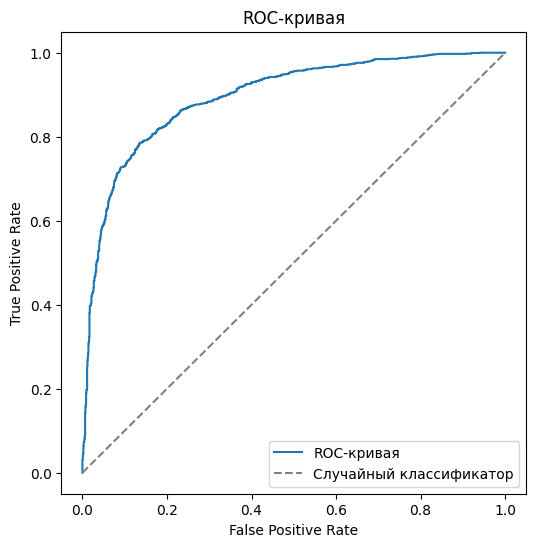

0.895233647204064

In [121]:
y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Случайный классификатор')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

roc_auc_score(y_test, y_proba)

In [122]:
def calculate(y_true, y_scores):
    thresholds = np.sort(np.unique(y_scores))[::-1]
    
    tpr_list, fpr_list = [], []
    precision_list = []


    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)

        TP = np.sum((y_pred == 1) & (y_true == 1))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))
        TN = np.sum((y_pred == 0) & (y_true == 0))

        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
        Precision = TP / (TP + FP) if (TP + FP) > 0 else 1

        tpr_list.append(TPR)
        fpr_list.append(FPR)
        precision_list.append(Precision)

    return np.array(fpr_list), np.array(tpr_list), thresholds,np.array(precision_list), np.array(tpr_list)


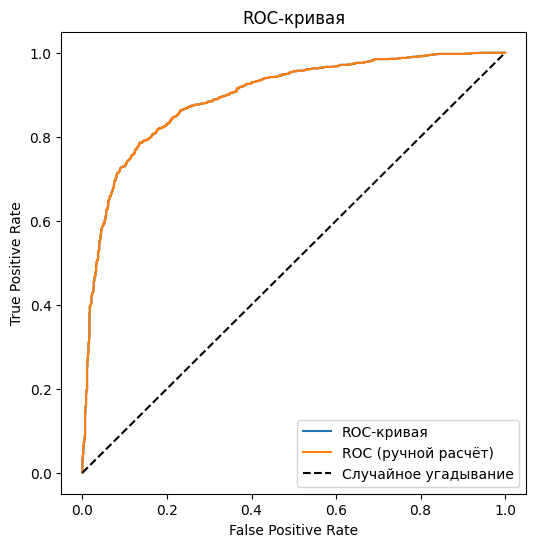

ROC-AUC (ручной расчёт): 0.8952336472040638


In [123]:
fpr_manual, tpr_manual, thresholds, precision, recall = calculate(y_test.values.ravel() , y_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC-кривая')
plt.plot(fpr_manual, tpr_manual, label='ROC (ручной расчёт)')
plt.plot([0, 1], [0, 1], 'k--', label='Случайное угадывание')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

roc_auc_manual = np.trapezoid(tpr_manual, fpr_manual)
print('ROC-AUC (ручной расчёт):', roc_auc_manual)

* Обе кривые совпали → значит ручная реализация верная.
* Кривая лежит **выше диагонали случайного угадывания** → модель действительно учится и даёт предсказания лучше случайных.
* ROC-кривая прижата к верхнему левому углу → модель **достаточно качественная**.
* Метрика ROC-AUC > 0.8 говорит о том, что модель имеет высокую различающую способность
* Если кривая ниже диагонали, что в теории возможно, то она перепутала классы и можно сделать замену мест классов, чтобы улучшить показания.

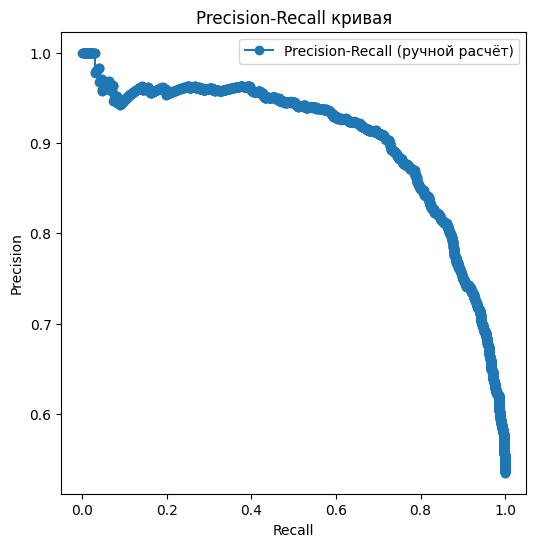

In [124]:
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, marker='o', label='Precision-Recall (ручной расчёт)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая')
plt.legend()
plt.show()